In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn import svm
from sklearn.linear_model import SGDClassifier

### Read in csvs and store into dataframes according to year

In [2]:
dfs = dict()
years = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
for year in years:
    dfs[year] = pd.read_csv(f'data/{year}_school_data.csv')

### Create new dataframe of all years except 2017

In [3]:
df_list = [dfs[year] for year in years[:-1]]
df_agr = pd.concat(df_list)

### Split new dataframe values to x and y

In [4]:
x = df_agr[['total_students', 'reduced_price']].values
y = df_agr.title_I.values 
print(x.shape, y.shape)

(113053, 2) (113053,)


### Split yearly dataframe values to x and y for testing

In [5]:
x_vals = dict()
y_vals = dict()
for year, df in dfs.items():
    x_vals[year] = df[['total_students', 'reduced_price']].values
    y_vals[year] = df.title_I.values 
    print(y_vals[year].shape, x_vals[year].shape)

(11902,) (11902, 2)
(12114,) (12114, 2)
(12351,) (12351, 2)
(12572,) (12572, 2)
(12592,) (12592, 2)
(12729,) (12729, 2)
(12865,) (12865, 2)
(13144,) (13144, 2)
(12784,) (12784, 2)
(12536,) (12536, 2)


# Linear SVC
    Data is already in standard scalar format, handled in EDA

In [6]:
lin_clf = svm.LinearSVC(C = 1e-5) 
lin_clf.fit(x, y)

LinearSVC(C=1e-05)

### Test on 2017 data gathered

In [7]:
jdr237/ML-project/blob/master/2021MLbenchmark.mdlin_score = lin_clf.score(x_vals[2017],y_vals[2017])
print(f'Linear SVC score: {lin_score}')

Linear SVC score: 0.8489948947032546


### Confusion matrix plot

<Figure size 432x288 with 0 Axes>

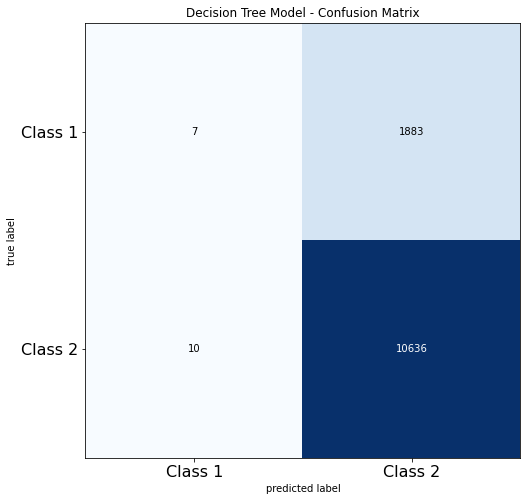

In [8]:
cm = confusion_matrix(y_vals[2017], lin_clf.predict(x_vals[2017]))
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Decision Tree Model - Confusion Matrix")
plt.xticks(range(2), ["Class 1","Class 2"], fontsize=16)
plt.yticks(range(2), ["Class 1","Class 2"], fontsize=16)
plt.show()

Linear SVC plot function

In [9]:
def plot_lin_svc(X, y, clf, C = 1e-5):
    plt.figure(figsize=(30, 15))
    decision_function = clf.decision_function(X)
    support_vector_indices = np.where(
        np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 2, 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
    plt.title(f'C={str(C)} support vectors')
    plt.tight_layout()
    plt.show()

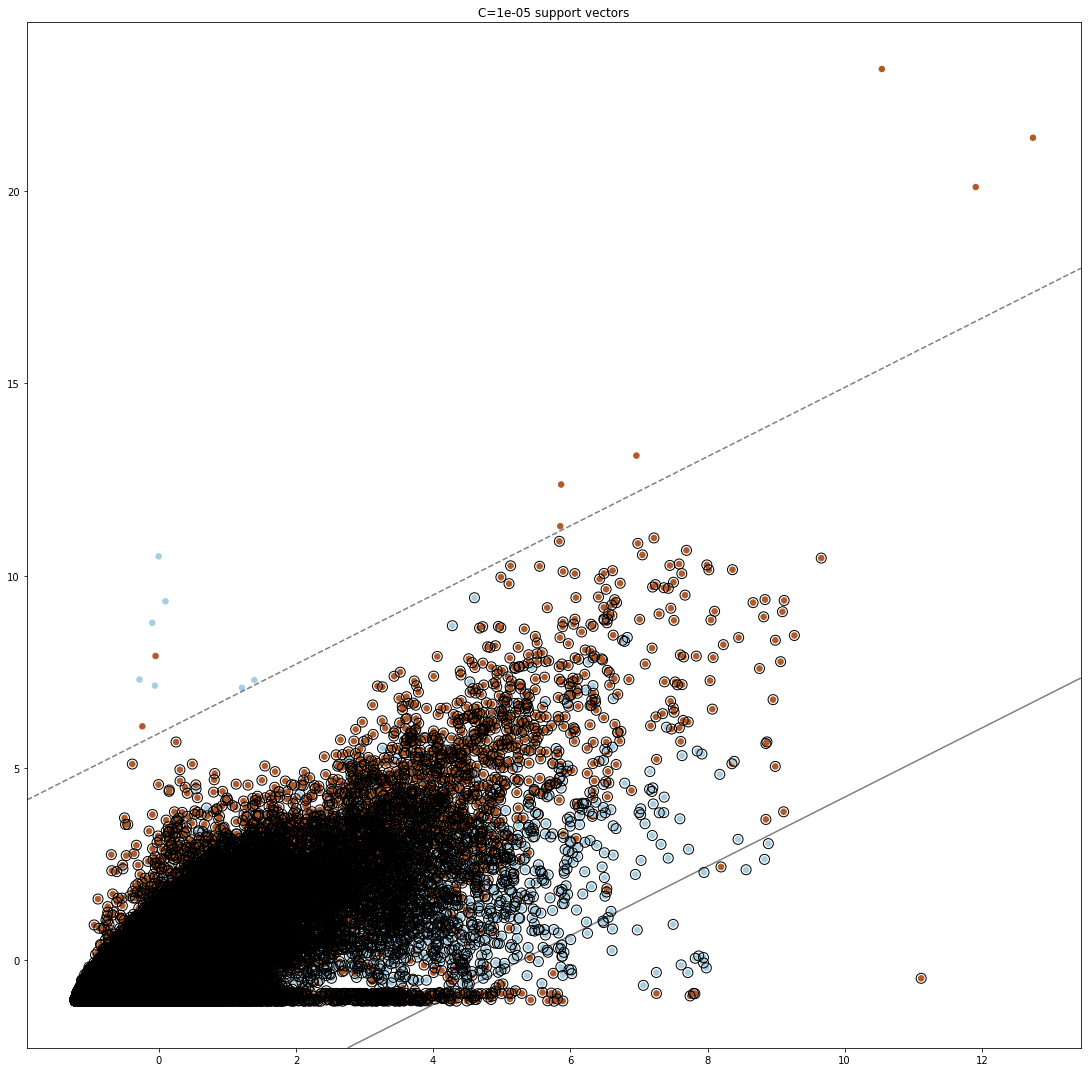

In [10]:
plot_lin_svc(x, y, lin_clf)

# SGD Classifier

In [11]:
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3)
sgd_clf.fit(x, y)

SGDClassifier()

### Test on 2017 data gathered

In [12]:
sgd_score = sgd_clf.score(x_vals[2017],y_vals[2017])
print(f'SGD score: {sgd_score}')

SGD score: 0.849234205488194


### Confusion matrix plot

<Figure size 432x288 with 0 Axes>

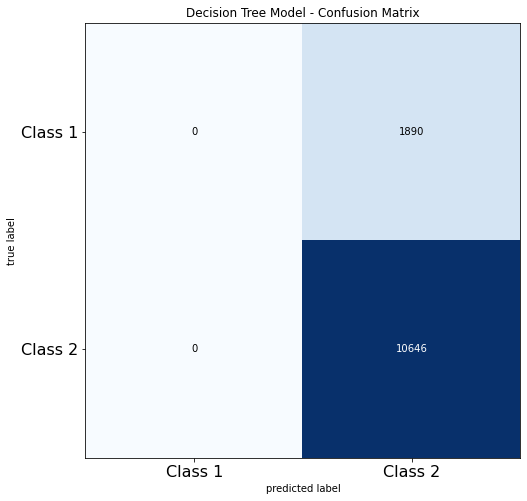

In [13]:
cm = confusion_matrix(y_vals[2017], sgd_clf.predict(x_vals[2017]))
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Decision Tree Model - Confusion Matrix")
plt.xticks(range(2), ["Class 1","Class 2"], fontsize=16)
plt.yticks(range(2), ["Class 1","Class 2"], fontsize=16)
plt.show()

### Total students and number of students on reduced price lunch does a good job predicting title I schools
Linear SVC being slightly more favorable

In [14]:
print(f'Linear SVC score: {lin_score}')
print(f'SGD score: {sgd_score}')

Linear SVC score: 0.8489948947032546
SGD score: 0.849234205488194
